In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from src.viz import plot_bipartite_graph
from src.utils import generate_bipartite_erdos_graph
from src.opt import BudgetedAllocationSolver
from src.evaluator import OnlineMatchingEvaluator

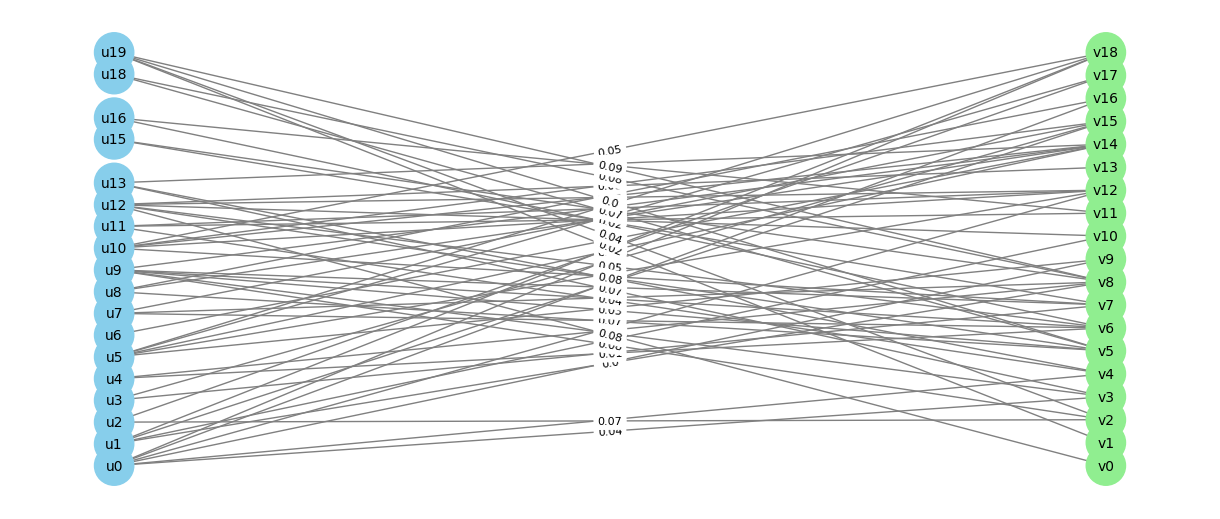

In [3]:
n_U, n_V = 20, 20

B, edges = generate_bipartite_erdos_graph(n_U, n_V, p_erd=np.log(n_U)/n_U, p_max=0.1)

U = [f"u{i}" for i in range(n_U)]
V = [f"v{j}" for j in range(n_V)]

plot_bipartite_graph(B, U, V, save_fig='./figs/graph_example.png')

In [4]:
class Baseline:
    def __init__(self, edges):
        pass
    def __call__(self, v, edges, set_u=None):
        return max(edges, key=lambda e: e[2])[1] if edges else "nill"

In [5]:
def simple_model(v, edges, set_u=None):
    return max(edges, key=lambda e: e[2])[1] if edges else None


evaluator = OnlineMatchingEvaluator(simple_model, B, edges)
evaluator.run()

1

In [6]:
# OPT pour ce modèle:
evaluator.opt

1.2700000000000777

In [7]:
from src.nonadaptive import NonAdaptive

In [8]:
algo = NonAdaptive(edges)

evaluator = OnlineMatchingEvaluator(algo, B, edges)
evaluator.run()

1

In [9]:
from src.stochasticbalance import StochasticBalance

In [10]:
algo = StochasticBalance(edges)

evaluator = OnlineMatchingEvaluator(algo, B, edges)
score = []
for _ in range(50):
    score.append(evaluator.run())

sum(score)/len(score)

0.34

In [11]:
evaluator.opt

1.2700000000000777

In [12]:
from src.benchmark import eval_benchmark

opt = {"algos": [Baseline, NonAdaptive, StochasticBalance], # List des fonction de chaque algo
       "names": ['Naive', 'NonAdaptive', 'StochasticBalance'],
       "p_values": ["random", 0.5, 0.1, 0.05], # Not the classical p values...
       "U_n": [20, 50, 150],
       "p_erd": [0.2, "n", "logn/n"],
       "k": 20,
       "p_max":0.1 # Proba max dans un edge dans le cas random
      }

results = eval_benchmark(opt)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:06<00:00,  1.63s/it]


In [13]:
from src.utils import results_to_df

df_results = results_to_df(results)
df_results.round(2)

Naive  NonAdaptive  StochasticBalance
p_value U_n p_erd                                        
random  20  0.2      0.31         0.52               0.62
            n        0.35         0.59               0.29
            logn/n   0.31         0.38               0.59
        50  0.2      0.32         0.47               0.51
            n        0.45         0.34               0.45
            logn/n   0.31         0.46               0.56
        150 0.2      0.28         0.44               0.51
            n        0.46         0.52               0.47
            logn/n   0.34         0.48               0.53
0.5     20  0.2      0.06         0.10               0.10
            n        0.05         0.10               0.10
            logn/n   0.06         0.10               0.10
        50  0.2      0.03         0.10               0.10
            n        0.07         0.11               0.11
            logn/n   0.05         0.10               0.10
        150 0.2      0.01         0.10               0.10
            n        0.07         0.09               0.09
            logn/n   0.04         0.10               0.10
0.1     20  0.2      0.22         0.42               0.50
            n        0.33         0.42               0.46
            logn/n   0.26         0.42               0.50
        50  0.2      0.13         0.43               0.50
            n        0.35         0.48               0.45
            logn/n   0.22         0.49               0.52
        150 0.2      0.05         0.44               0.50
            n        0.36         0.45               0.46
            logn/n   0.20         0.41               0.49
0.05    20  0.2      0.35         0.85               0.85
            n        0.60         0.50               0.80
            logn/n   0.45         0.55               0.80
        50  0.2      0.24         0.68               0.90
            n        0.43         0.61               0.75
            logn/n   0.43         0.57               0.73
        150 0.2      0.13         0.67               0.95
            n        0.53         0.62               0.64
            logn/n   0.34         0.64               0.82